<a href="https://colab.research.google.com/github/el-muarrof/tubesTKC-171_173/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
#ekstrak zip
import os
import zipfile

local_zip = '/content/drive/MyDrive/Tugbes_tkc/breastHis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
# Definisikan path untuk data train dan data validation

base_dataset = "/content/breastHis"
breast_dir = os.listdir(base_dataset)

In [4]:
BreastCancerImage = 'BreastCancerImage'
image_benign_dir = '/content/BreastCancerImage/benign'
image_malignant_dir = '/content/BreastCancerImage/malignant'

os.mkdir (BreastCancerImage)
os.mkdir (image_benign_dir)
os.mkdir (image_malignant_dir)

In [5]:
benign_image = '/content/breastHis/benign'
benign_dir = os.listdir(benign_image)

In [6]:
import shutil

for patient in breast_dir:   
  path_dir = base_dataset+ '/'+ str(patient)
  path_new = '/content/BreastCancerImage/' + str(patient)
  for p in os.listdir(path_dir):
    path = path_dir + '/' + p 
    file = os.listdir(path)

    for fname in file:
            src = os.path.join(path, fname)
            dst = os.path.join(path_new, fname)
            shutil.copyfile(src, dst)

In [7]:
!pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio("/content/BreastCancerImage", output='SplitWithRatio', seed=42, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 1995 files [00:17, 115.20 files/s]


In [9]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk('/content/SplitWithRatio/train'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [10]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk('/content/SplitWithRatio/val'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [11]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1596, 150, 150, 3)
Train Label =  (1596,)
Validation Data =  (378, 150, 150, 3)
Validation Label =  (378,)


In [12]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [172 162 178]
Data setelah di-normalisasi  [0.6745098  0.63529414 0.69803923]


In [13]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [15]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25)) 
model.add(Flatten())

In [35]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [37]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [38]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
50/50 [==============================] - 4s 52ms/step - loss: 0.4300 - acc: 0.6729 - val_loss: 0.5874 - val_acc: 0.6878
Epoch 2/100
50/50 [==============================] - 2s 46ms/step - loss: 0.2437 - acc: 0.9461 - val_loss: 0.7354 - val_acc: 0.7037
Epoch 3/100
50/50 [==============================] - 2s 46ms/step - loss: 0.1883 - acc: 0.9417 - val_loss: 0.6726 - val_acc: 0.8254
Epoch 4/100
50/50 [==============================] - 2s 46ms/step - loss: 0.1317 - acc: 0.9618 - val_loss: 0.6914 - val_acc: 0.7646
Epoch 5/100
50/50 [==============================] - 2s 46ms/step - loss: 0.1166 - acc: 0.9649 - val_loss: 0.8317 - val_acc: 0.8095
Epoch 6/100
50/50 [==============================] - 2s 46ms/step - loss: 0.1064 - acc: 0.9687 - val_loss: 0.8459 - val_acc: 0.7989
Epoch 7/100
50/50 [==============================] - 2s 46ms/step - loss: 0.1296 - acc: 0.9599 - val_loss: 0.9194 - val_acc: 0.8254
Epoch 8/100
50/50 [==============================] - 2s 46ms/step - loss: 0.

<h3>Evaluasi Model</h3>

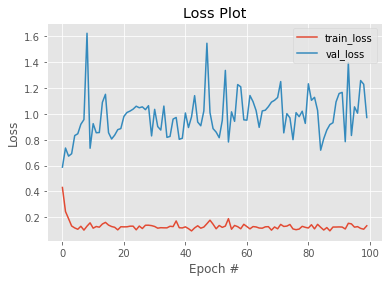

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

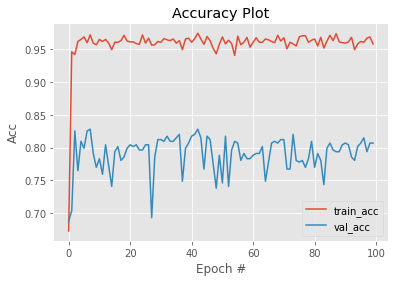

In [40]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       118
           1       0.86      0.86      0.86       260

    accuracy                           0.81       378
   macro avg       0.78      0.77      0.77       378
weighted avg       0.81      0.81      0.81       378

